<a href="https://colab.research.google.com/github/Iamfouzia/AI_Machine_Learning_projects/blob/main/MNIST_2_Classification_and_Reg_with_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Classification Models**

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression, LinearRegression

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
# Load the data
from google.colab import drive
drive.mount('/content/drive')
%matplotlib inline
import matplotlib.pyplot as plt #for data visualizing
import seaborn as sns
color = sns.color_palette()

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


Mounted at /content/drive


In [ ]:
# Load the data
from google.colab import drive
drive.mount('/content/drive')
%matplotlib inline
import matplotlib.pyplot as plt #for data visualizing
import seaborn as sns
color = sns.color_palette()

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier



# Load dataset
train_df = pd.read_csv("/content/drive/MyDrive/mnist_train.csv")
test_df = pd.read_csv("/content/drive/MyDrive/mnist_test.csv")

# Features & Labels
X_train = train_df.drop("label", axis=1) / 255.0
y_train = train_df["label"]
X_test = test_df.drop("label", axis=1) / 255.0
y_test = test_df["label"]

# Small subset for speed
X_train_small, y_train_small = X_train.iloc[:10000], y_train.iloc[:10000]
X_test_small, y_test_small = X_test.iloc[:2000], y_test.iloc[:2000]

# ===== Helper function for confusion matrix =====
def plot_confusion(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=False, cmap="Blues", fmt="d")
    plt.title(f"Confusion Matrix - {title}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()





Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Logistic Regression Accuracy: 0.871
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.95       175
           1       0.93      0.97      0.95       234
           2       0.87      0.83      0.85       219
           3       0.85      0.84      0.84       207
           4       0.89      0.90      0.89       217
           5       0.82      0.82      0.82       179
           6       0.87      0.92      0.90       178
           7       0.86      0.85      0.86       205
           8       0.83      0.79      0.81       192
           9       0.82      0.84      0.83       194

    accuracy                           0.87      2000
   macro avg       0.87      0.87      0.87      2000
weighted avg       0.87      0.87      0.87      2000



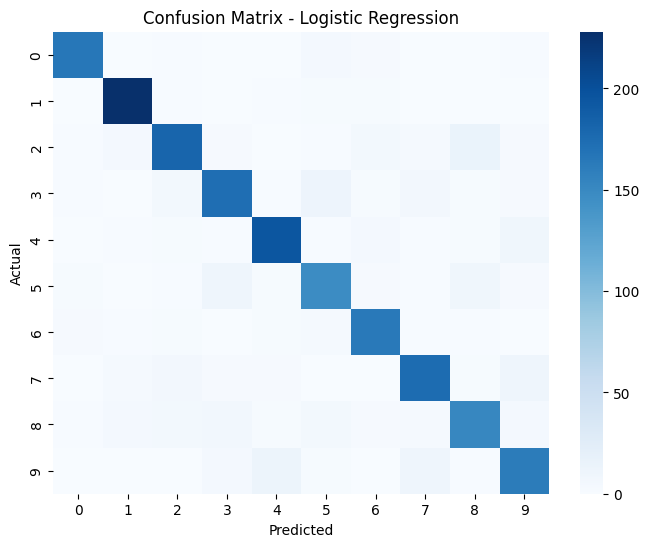

In [ ]:
#1. Logistic Regression
log_reg = LogisticRegression(max_iter=1000, solver='saga', n_jobs=-1, random_state=42)
log_reg.fit(X_train_small, y_train_small)
y_pred = log_reg.predict(X_test_small)

print("Logistic Regression Accuracy:", accuracy_score(y_test_small, y_pred))
print("Classification Report:\n", classification_report(y_test_small, y_pred))
plot_confusion(y_test_small, y_pred, "Logistic Regression")


SVM Accuracy: 0.871
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.95       175
           1       0.93      0.97      0.95       234
           2       0.87      0.83      0.85       219
           3       0.85      0.84      0.84       207
           4       0.89      0.90      0.89       217
           5       0.82      0.82      0.82       179
           6       0.87      0.92      0.90       178
           7       0.86      0.85      0.86       205
           8       0.83      0.79      0.81       192
           9       0.82      0.84      0.83       194

    accuracy                           0.87      2000
   macro avg       0.87      0.87      0.87      2000
weighted avg       0.87      0.87      0.87      2000



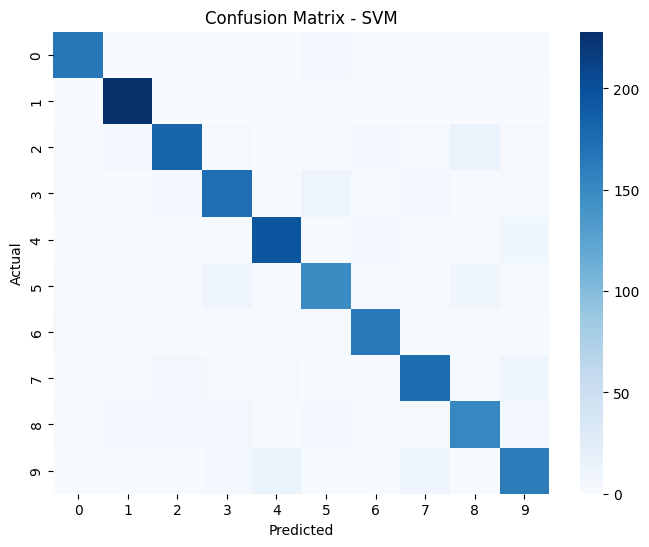

In [ ]:
# 2. Support Vector Machine (SVM)

# Standardize (important for SVM)
scaler = StandardScaler()
X_train_small_scaled = scaler.fit_transform(X_train_small)
X_test_small_scaled = scaler.transform(X_test_small)
print("SVM Accuracy:", accuracy_score(y_test_small, y_pred))
print("Classification Report:\n", classification_report(y_test_small, y_pred))
plot_confusion(y_test_small, y_pred, "SVM")

Random Forest Accuracy: 0.929
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       175
           1       0.98      0.98      0.98       234
           2       0.91      0.93      0.92       219
           3       0.91      0.91      0.91       207
           4       0.95      0.92      0.93       217
           5       0.93      0.92      0.92       179
           6       0.91      0.96      0.93       178
           7       0.93      0.90      0.92       205
           8       0.93      0.85      0.89       192
           9       0.88      0.92      0.90       194

    accuracy                           0.93      2000
   macro avg       0.93      0.93      0.93      2000
weighted avg       0.93      0.93      0.93      2000



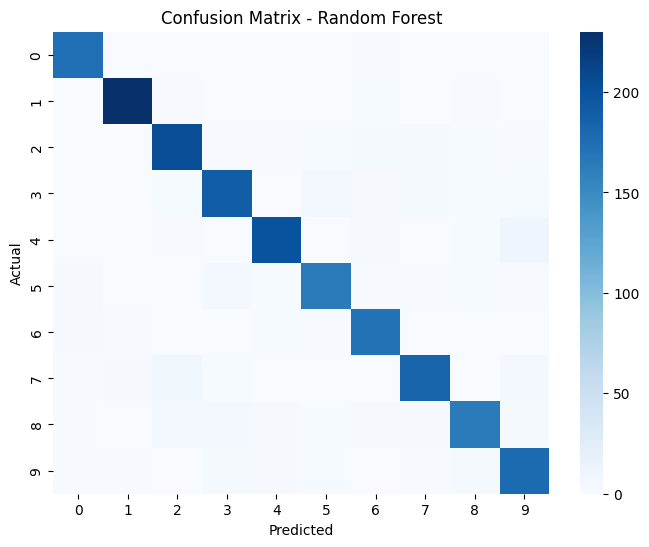

In [ ]:
#3 Random Forest
rf_model = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
rf_model.fit(X_train_small, y_train_small)
y_pred = rf_model.predict(X_test_small)

print("Random Forest Accuracy:", accuracy_score(y_test_small, y_pred))
print("Classification Report:\n", classification_report(y_test_small, y_pred))

plot_confusion(y_test_small, y_pred, "Random Forest")

KNN Accuracy: 0.9235
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       175
           1       0.90      1.00      0.95       234
           2       0.98      0.89      0.93       219
           3       0.91      0.91      0.91       207
           4       0.94      0.94      0.94       217
           5       0.91      0.91      0.91       179
           6       0.95      0.97      0.96       178
           7       0.89      0.91      0.90       205
           8       0.95      0.80      0.87       192
           9       0.89      0.90      0.89       194

    accuracy                           0.92      2000
   macro avg       0.92      0.92      0.92      2000
weighted avg       0.92      0.92      0.92      2000



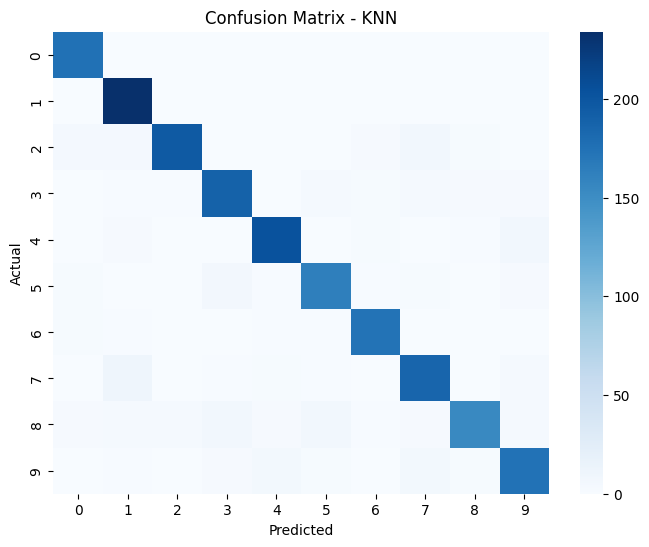

In [ ]:
#4.K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_small, y_train_small)
y_pred = knn_model.predict(X_test_small)

print("KNN Accuracy:", accuracy_score(y_test_small, y_pred))
print("Classification Report:\n", classification_report(y_test_small, y_pred))

plot_confusion(y_test_small, y_pred, "KNN")



/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP Accuracy: 0.9305
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       175
           1       0.97      0.99      0.98       234
           2       0.92      0.91      0.92       219
           3       0.93      0.93      0.93       207
           4       0.94      0.93      0.94       217
           5       0.94      0.94      0.94       179
           6       0.93      0.92      0.93       178
           7       0.92      0.89      0.91       205
           8       0.89      0.90      0.90       192
           9       0.89      0.91      0.90       194

    accuracy                           0.93      2000
   macro avg       0.93      0.93      0.93      2000
weighted avg       0.93      0.93      0.93      2000



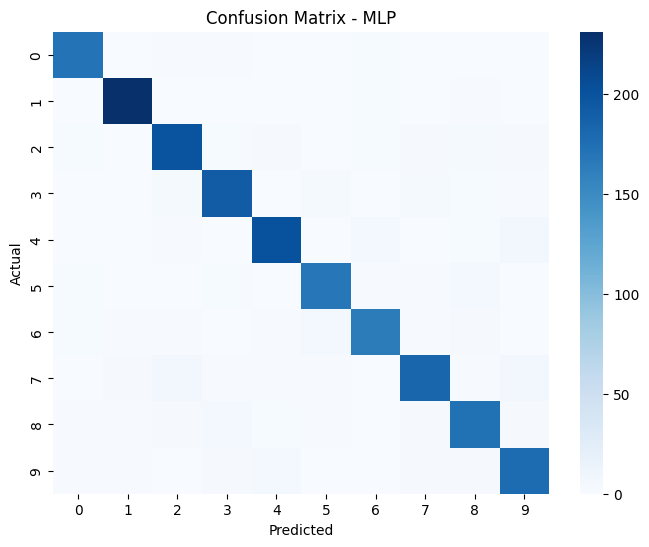

In [ ]:

#5. MLP (Neural Network)

mlp_model = MLPClassifier(hidden_layer_sizes=(128,), max_iter=20, random_state=42)
mlp_model.fit(X_train_small_scaled, y_train_small)
y_pred = mlp_model.predict(X_test_small_scaled)

print("MLP Accuracy:", accuracy_score(y_test_small, y_pred))
print("Classification Report:\n", classification_report(y_test_small, y_pred))
plot_confusion(y_test_small, y_pred, "MLP")

**Naive Bayes**

Naive Bayes Accuracy: 0.5075
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.93      0.79       175
           1       0.57      0.98      0.72       234
           2       0.88      0.26      0.40       219
           3       0.72      0.26      0.38       207
           4       0.70      0.12      0.20       217
           5       0.75      0.08      0.15       179
           6       0.68      0.79      0.73       178
           7       0.83      0.29      0.43       205
           8       0.25      0.49      0.33       192
           9       0.36      0.92      0.51       194

    accuracy                           0.51      2000
   macro avg       0.64      0.51      0.46      2000
weighted avg       0.64      0.51      0.46      2000



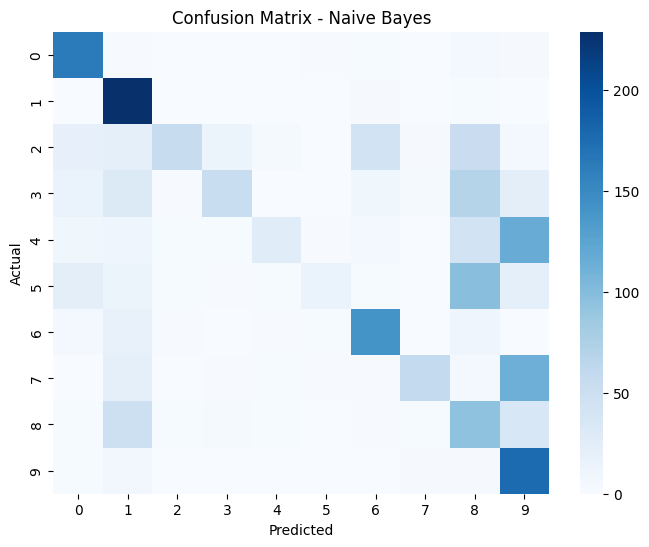

In [ ]:
#6. Naive Bayes
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train_small_scaled, y_train_small)
y_pred = nb_model.predict(X_test_small_scaled)

print("Naive Bayes Accuracy:", accuracy_score(y_test_small, y_pred))
print("Classification Report:\n", classification_report(y_test_small, y_pred))

plot_confusion(y_test_small, y_pred, "Naive Bayes")


**Decision Tree**

Decision Tree Accuracy: 0.7805
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.85       175
           1       0.89      0.92      0.91       234
           2       0.80      0.77      0.78       219
           3       0.74      0.72      0.73       207
           4       0.78      0.75      0.77       217
           5       0.67      0.69      0.68       179
           6       0.83      0.76      0.79       178
           7       0.82      0.84      0.83       205
           8       0.63      0.64      0.64       192
           9       0.78      0.80      0.79       194

    accuracy                           0.78      2000
   macro avg       0.78      0.78      0.78      2000
weighted avg       0.78      0.78      0.78      2000



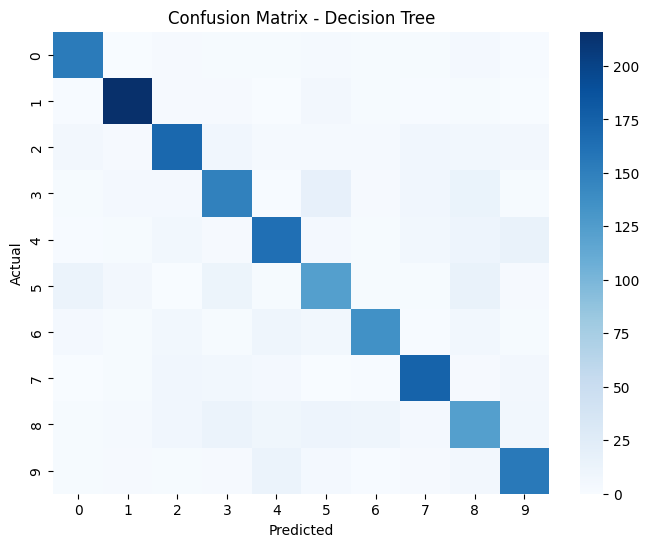

In [ ]:
#7.Decision Tree
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_small, y_train_small)
y_pred = dt_model.predict(X_test_small)

print("Decision Tree Accuracy:", accuracy_score(y_test_small, y_pred))
print("Classification Report:\n", classification_report(y_test_small, y_pred))

plot_confusion(y_test_small, y_pred, "Decision Tree")


**Try Multiple models**

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
# Load the data
from google.colab import drive
drive.mount('/content/drive')
%matplotlib inline
import matplotlib.pyplot as plt #for data visualizing
import seaborn as sns
color = sns.color_palette()

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# 1. Load CSV files
train_df = pd.read_csv("/content/drive/MyDrive/mnist_train.csv")
test_df = pd.read_csv("/content/drive/MyDrive/mnist_test.csv")

# 2. Split into features and labels
X_train = train_df.drop('label', axis=1) / 255.0
y_train = train_df['label']

X_test = test_df.drop('label', axis=1) / 255.0
y_test = test_df['label']

# 3. Use small subset to avoid long training
X_train_small = X_train.iloc[:10000]
y_train_small = y_train.iloc[:10000]

X_test_small = X_test.iloc[:2000]
y_test_small = y_test.iloc[:2000]

# Standardize for MLP
scaler = StandardScaler()
X_train_small_scaled = scaler.fit_transform(X_train_small)
X_test_small_scaled = scaler.transform(X_test_small)

# 4. Train multiple models on small data
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, solver='saga', n_jobs=-1, random_state=42)
,
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=3),
    "MLP (Neural Network)": MLPClassifier(hidden_layer_sizes=(128,), max_iter=20)
}

for name, model in models.items():
    print(f"\n======= {name} =======")

    if name == "MLP (Neural Network)":
        model.fit(X_train_small_scaled, y_train_small)
        y_pred = model.predict(X_test_small_scaled)
    else:
        model.fit(X_train_small, y_train_small)
        y_pred = model.predict(X_test_small)

    acc = accuracy_score(y_test_small, y_pred)
    print(f"Accuracy: {acc:.4f}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

======= Logistic Regression =======
Accuracy: 0.8710

======= SVM =======
Accuracy: 0.9445

======= Random Forest =======
Accuracy: 0.9290

======= KNN =======
Accuracy: 0.9235

======= MLP (Neural Network) =======
Accuracy: 0.9315


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
